In [44]:
# data exploration / preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (StandardScaler, RobustScaler,
                                   FunctionTransformer, QuantileTransformer)

# model fitting / evaluation / export
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import (RandomForestClassifier, RandomForestRegressor, 
                              VotingClassifier)

from lightgbm import LGBMClassifier, LGBMRegressor, plot_metric, plot_importance
from sklearn.inspection import permutation_importance
from sklearn.model_selection import (train_test_split, StratifiedKFold, KFold,
                                     cross_validate,
                                     RandomizedSearchCV, GridSearchCV)


from sklearn.preprocessing import StandardScaler
import time

# misc
from IPython.display import display_html

In [2]:
df = pd.read_csv(r"C:\Users\abarr\Downloads\Data_for_UCI_named.csv")
df.head(10)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,stable
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,0.005954,unstable
7,6.953512,1.379125,5.719400,7.870307,3.224495,-0.748998,-1.186517,-1.288980,0.371385,0.633204,0.732741,0.380544,0.016634,unstable
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,-0.038677,stable
9,9.841496,1.413822,9.769856,7.641616,4.727595,-1.991363,-0.857637,-1.878594,0.376356,0.544415,0.792039,0.116263,0.012383,unstable


Quick Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [4]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [5]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [6]:
df['stabf'].value_counts(normalize = True)

unstable    0.638
stable      0.362
Name: stabf, dtype: float64

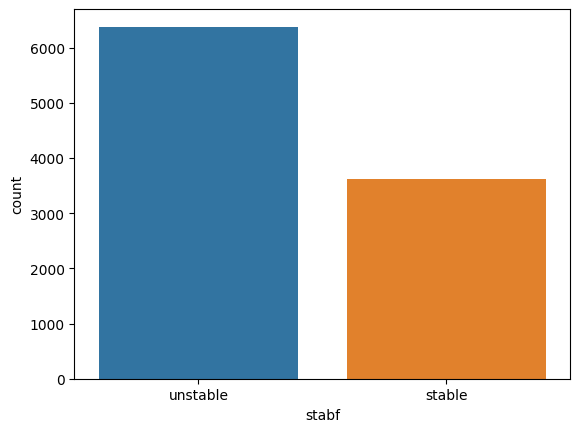

In [7]:
#Viewing stabf countplot
sns.countplot(data = df, x = 'stabf');

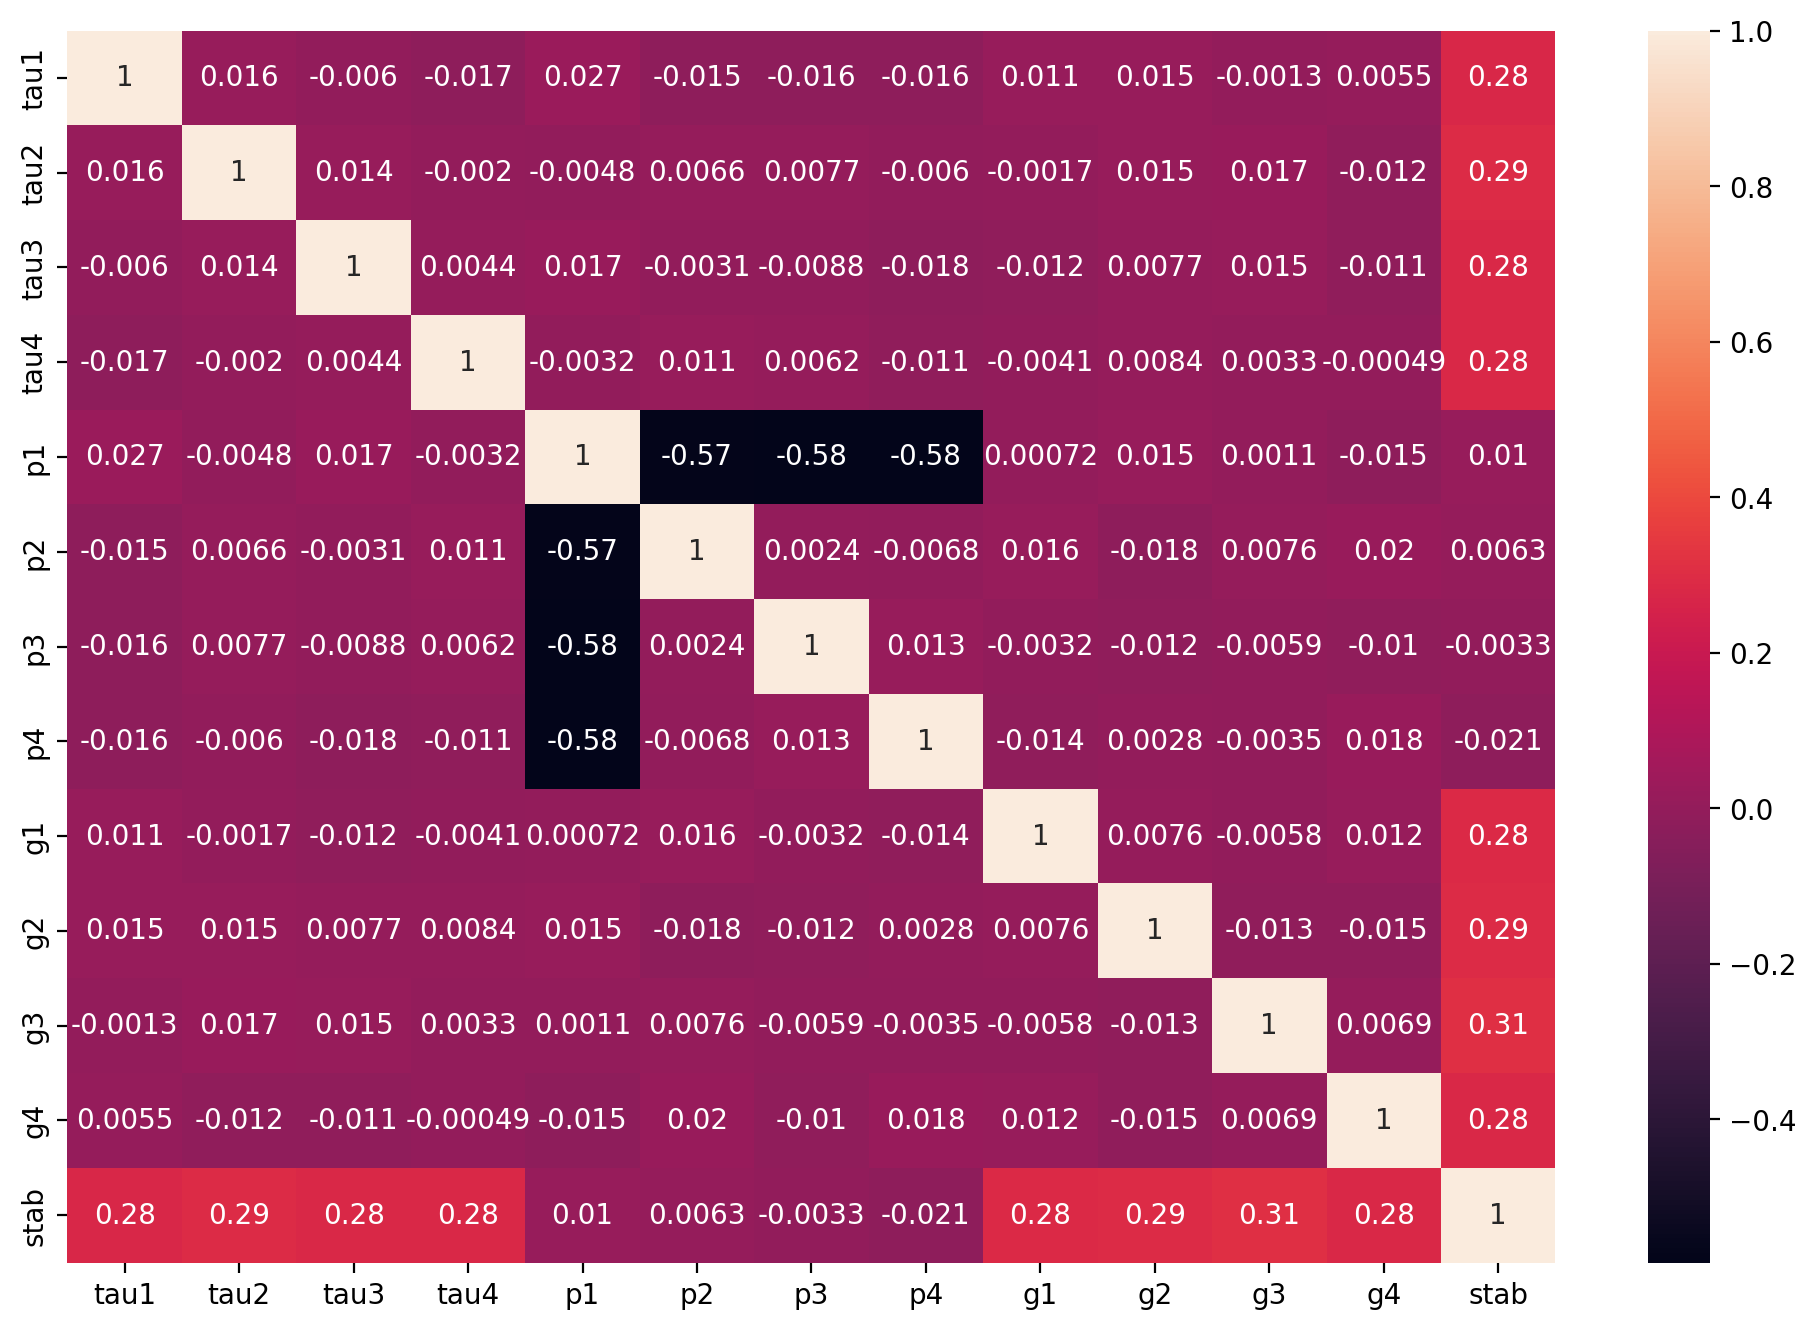

In [9]:
plt.figure(figsize = (12,8), dpi =200)
sns.heatmap(df.corr(), annot = True);

Build models

In [8]:
X = df.drop(["stabf", "stab"], axis = 1)
y = df["stabf"]

In [10]:
# classifiers
log_reg = LogisticRegression(random_state = 1)
rfc = RandomForestClassifier(random_state = 1)
lgbc = LGBMClassifier(random_state = 1)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [12]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [13]:
log_reg.fit(scaled_X_train, y_train)

LogisticRegression(random_state=1)

In [14]:
log_reg.coef_

array([[ 0.86576062,  0.90758235,  0.8870653 ,  0.9095107 , -0.00723602,
         0.05153914,  0.01248239, -0.05115978,  0.75437344,  0.8365807 ,
         0.86400952,  0.8072807 ]])

In [15]:
y_pred = log_reg.predict_proba(scaled_X_test)
y_pred

array([[0.03728156, 0.96271844],
       [0.18420891, 0.81579109],
       [0.86302105, 0.13697895],
       ...,
       [0.4578489 , 0.5421511 ],
       [0.39845509, 0.60154491],
       [0.03612986, 0.96387014]])

In [16]:
y_pred = log_reg.predict(scaled_X_test)

In [17]:
accuracy_score(y_test, y_pred)

0.804

In [18]:
log_reg.classes_

array(['stable', 'unstable'], dtype=object)

In [19]:
cm = confusion_matrix(y_test, y_pred, labels =log_reg.classes_)
cm

array([[ 494,  218],
       [ 174, 1114]], dtype=int64)

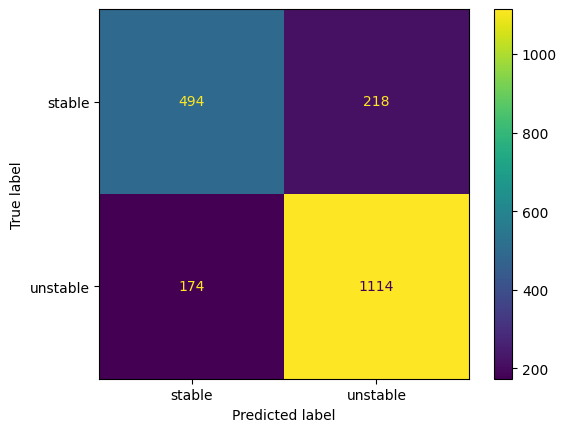

In [20]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['stable', 'unstable'])
cm_display.plot();

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      stable       0.74      0.69      0.72       712
    unstable       0.84      0.86      0.85      1288

    accuracy                           0.80      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.80      0.80      0.80      2000



In [45]:
# creating a RF classifier
rfc = RandomForestClassifier(max_depth = 9, random_state = 1)
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rfc.fit(X_train, y_train)
# performing predictions on the test dataset
y_pred = rfc.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))



ACCURACY OF THE MODEL:  0.914


In [23]:
#Creating an Extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
# Building the model
etc = ExtraTreesClassifier(n_estimators=100, random_state=1)
# fit function is used to train the model using the training sets as parameters
etc.fit(X_train, y_train)
# performing predictions on the test dataset
y_pred = etc.predict(X_test)
# metrics are used to find accuracy or error

print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))



ACCURACY OF THE MODEL:  0.928


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [37]:
y_test = le.fit_transform(y_test)

In [26]:
#Creating XGBoost model
import xgboost as xgb
from xgboost import XGBClassifier

In [28]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [33]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [34]:
y_pred = model.predict(X_test)

In [35]:
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [38]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9455

In [40]:
#Creating Lightgbm model
import lightgbm as lgb
base_model = lgb.LGBMClassifier()
base_model.fit(X_train, y_train)

LGBMClassifier()

In [41]:
y_pred = base_model.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [42]:
accuracy_score(y_test, y_pred)


0.939

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       712
           1       0.94      0.97      0.95      1288

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000

